In [1]:
import numpy as np
import pandas as pd
from matplotlib import collections  as mc
import pylab as pl
import matplotlib.pyplot as plt

In [2]:
def barlett(n, p):
    sd = []
    for k in range(len(p)):
        sd.extend([np.sqrt((1 + sum([2*p_k**2 for p_k in p[:k+1]]))/n)])
    return sd

In [3]:
def acf(y, max_lags, barlett_ci = False, display = True):
    if type(y) == list:
        y = pd.DataFrame(y)
    elif y == pd.core.frame.DataFrame:
        pass
    else: 
        print("Type {} not supported.".format(type(y)))
    mean = y.mean()[0]
    var = y.var()[0]
    _acf = []
    T = len(y)
    for p in range(max_lags+1):
        tmp = pd.concat([y, y.shift(p)], axis = 1).dropna()
        tmp = tmp-mean
        mult = tmp.iloc[:, 0] * tmp.iloc[:, 1]
        mult = mult.sum()/(var * (T-1))
        _acf.append(mult)
    if barlett_ci:
        sd = barlett(T, _acf)
    else:
        sd = [np.sqrt(1/T)]*(max_lags+1)
    
    up_ci, lw_ci = [1.96*x for x in sd], [-1.96*x for x in sd]
    coords = []
    for x1, x2 in zip(range(max_lags+1), _acf):
        coords.append([(x1, 0), (x1, x2)])
    if display:
        lc = mc.LineCollection(coords, linewidths=1, color = "black")
        fig, ax = pl.subplots()
        ax.add_collection(lc)
        ax.autoscale()
        ax.axhline(y=0, xmin=0.0, xmax=1, color = "black", linewidth = 1)
        ax.plot(lw_ci, linestyle = "--", color = "blue", linewidth = 1)
        ax.plot(up_ci, linestyle = "--", color = "blue", linewidth = 1)
        ax.scatter(range(max_lags+1), _acf)
        
        return _acf
    else:
        return _acf, sd

In [4]:
a = list(range(100))

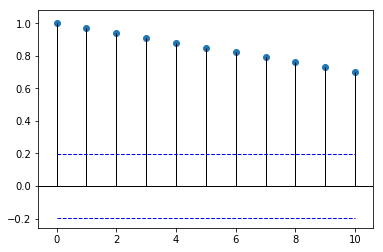

In [5]:
b = acf(y=a, max_lags = 10, barlett_ci=False)

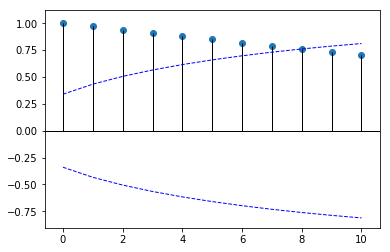

In [6]:
b = acf(y=a, max_lags=10, barlett_ci=True)